In [1]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
eye = np.eye(4)

In [3]:
print(eye)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
sparse_matrix = sparse.csr_matrix(eye)

In [5]:
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


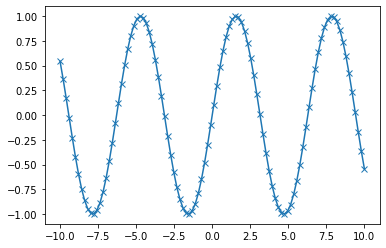

In [6]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x')

In [7]:
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
       'Location': ['New York', 'Paris', 'Berlin', 'Toronto'],
       'Age': ['12', '25', '35', '42']}
data_pandas = pd.DataFrame(data)
display(data_pandas)

Name  Location Age
0   John  New York  12
1   Anna     Paris  25
2  Peter    Berlin  35
3  Linda   Toronto  42

In [8]:
data_pandas = pd.DataFrame(data)
data_pandas['Age'] = data_pandas['Age'].str.replace(",", "").astype(int)
print(data_pandas[data_pandas.Age > 21])

    Name Location  Age
1   Anna    Paris   25
2  Peter   Berlin   35
3  Linda  Toronto   42


In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print('Keys of iris dataset: \n{}'.format(iris_dataset.keys()))

Keys of iris dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [10]:
print(iris_dataset['DESCR'][:1100] + '\n ... ')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [12]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris_dataset['data'].shape

(150, 4)

In [14]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                   iris_dataset['target'],
                                                   random_state=0)

In [16]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((112, 4), (38, 4), (38,), (112,))

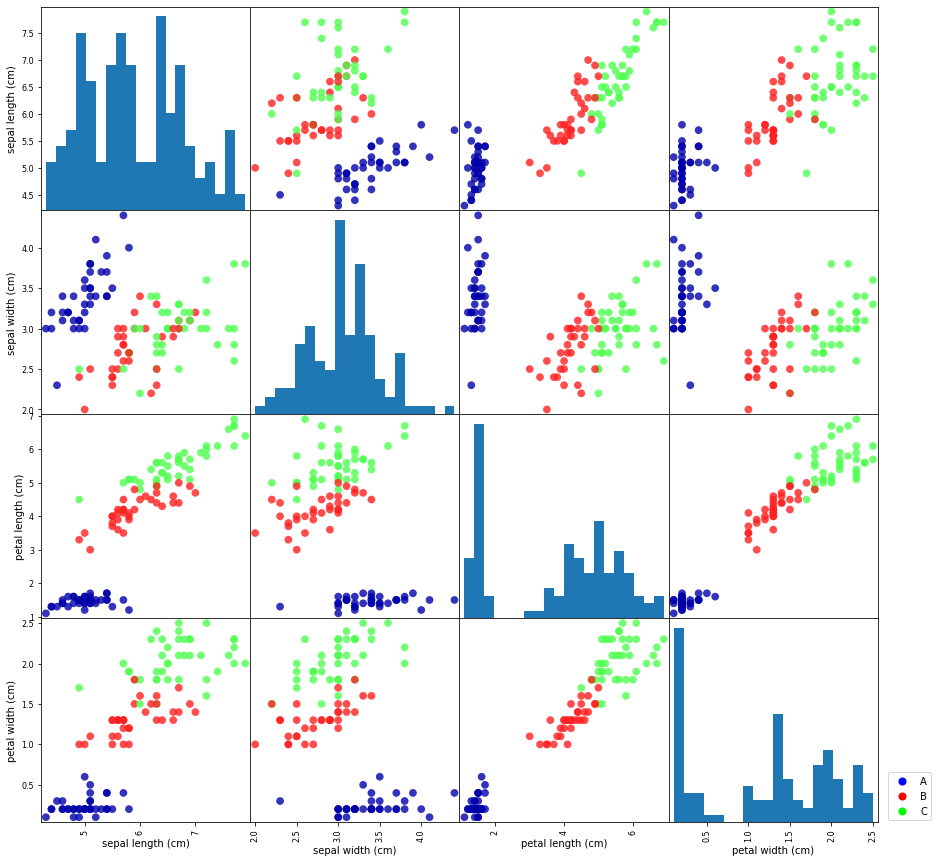

In [17]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                       hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

handles = [plt.plot([], [], color=plt.cm.brg(i/2), ls='', 
                    marker='.', markersize=np.sqrt(200))[0] for i in range(3)]
labels=['A', 'B', 'C']
plt.legend(handles, labels, loc=(1.05, 0.01))
plt.show()

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

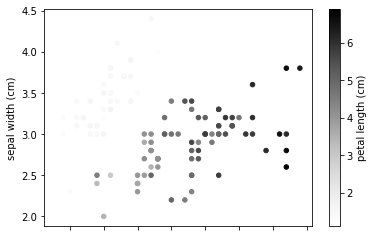

In [18]:
df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
df.plot(x=iris_dataset.feature_names[0],
        y=iris_dataset.feature_names[1],
        c=iris_dataset.feature_names[2],
        kind='scatter')

In [19]:
iris_dataframe = pd.DataFrame(iris_dataset['data'])
iris_dataframe.columns = iris_dataset['feature_names']
iris_dataframe['species'] = iris_dataset['target']
iris_dataframe['species'] = iris_dataframe['species'].replace([0, 1, 2],  
                                                              iris_dataset['target_names'])

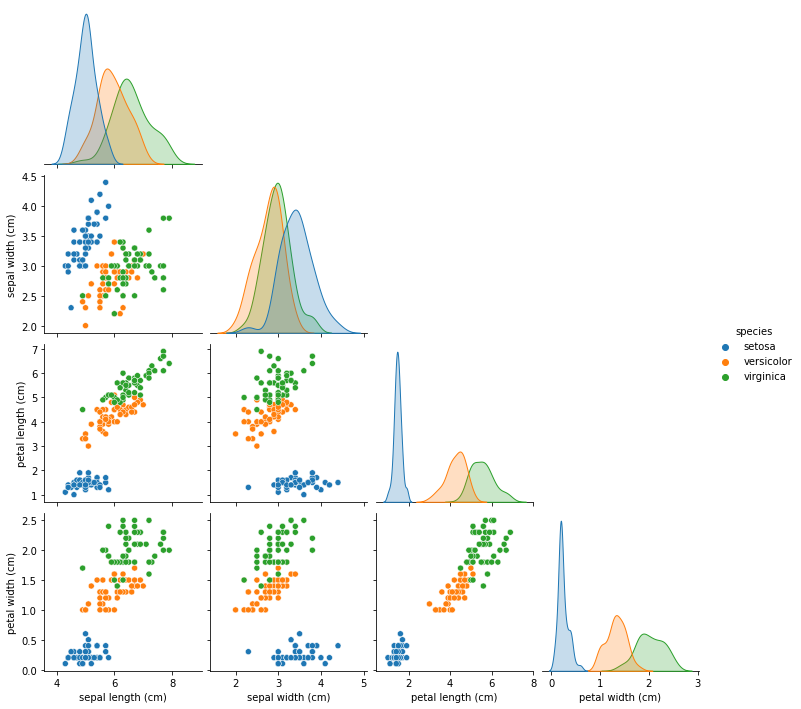

In [22]:
sns.pairplot(data=iris_dataframe, corner=True, hue='species')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [28]:
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=1)


In [29]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape)

(1, 4)


In [30]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [31]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print(np.mean(y_pred == y_test))

0.9736842105263158


In [33]:
knn.score(X_test, y_test)

0.9736842105263158